# Corner detection
A corner is a point of interest in an image in which the gradient takes strong values in all directions. One of the first operators to find out corner points has been developed by Harris and Stephens and is based on the gradient operator. The Harris operator is isotropic, that is, the operator's value in one pixel does not depend on the orientation of the gradient.

In [1]:
import numpy as np
import math
import skimage
from skimage import io
from skimage import filters
from skimage import util
import matplotlib as mpl
import matplotlib.pyplot as plt
from platform import python_version
print("python version: %s"%python_version())
print("numpy version: %s"%np.__version__)
#print("pandas version: %s"%pd.__version__)
print("skimage version: %s"%skimage.__version__)
print("matplotlib version: %s"%mpl.__version__)

python version: 3.8.2
numpy version: 1.18.1
skimage version: 0.17.2
matplotlib version: 3.3.1


## The Harris corner detector
We import the definitions of the horizontal and vertical derivatives that we have developed for edge detection.

In [150]:
def dip_gaussianFilter(image):
    # Creates a smoothed image from the input one by computing the
    # average value of each pixel from its neighbors' values. The size
    # of the filter is 5x5
    H = np.array(((0, 1, 2, 1, 0), 
                  (1, 3, 5, 3, 1), 
                  (2, 5, 9, 5, 2), 
                  (1, 3, 5, 3, 1), 
                  (0, 1, 2, 1, 0))) # filter
    rows = image.shape[0]
    cols = image.shape[1]
    smooth_img = np.zeros((rows, cols), dtype=int)
    
    for col in range(0, cols - 1):
        for row in range(0, rows - 1):
            sum = 0
            for i in range(-1, 2):
                for j in range(-1, 2):
                    v = image[row + i, col + j] * H[i + 1, j + 1]
                    sum = sum + v
            smooth_img[row, col] = int(round( sum ))
    
    return smooth_img / 57

In [151]:
from ipynb.fs.full.dip_functions import dip_horizontalDerivative
from ipynb.fs.full.dip_functions import dip_verticalDerivative

In [56]:
def corner_response(image, alpha, threshold):
    rows = image.shape[0]
    cols = image.shape[1]
    candidates = np.zeros((rows * cols, 3), dtype=int)  # at most each pixel is a point of interest
    Ix = dip_horizontalDerivative(image)
    Iy = dip_verticalDerivative(image)
    A = Ix * Ix
    B = Iy * Iy
    C = Ix * Iy
    A_ = dip_gaussianFilter(A)
    B_ = dip_gaussianFilter(B)
    C_ = dip_gaussianFilter(C)
    Q = A_ * B_  - C_ * C_ - alpha * (A_ + B_) * (A_ + B_)
    
    counter = 0
    for col in range(0, cols):
        for row in range(0, rows):
            if Q[row, col] > threshold and row > 0 and col > 0:
                candidates[counter, 0] = row
                candidates[counter, 1] = col
                candidates[counter, 2] = image[row, col]
                counter = counter + 1
    
    corners = np.zeros((counter, 3), dtype=int)
    for i in range(0, counter):
        corners[i, 0] = candidates[i, 0]
        corners[i, 1] = candidates[i, 1]
        corners[i, 2] = candidates[i, 2]
        
    for c in range(0, counter):
        corner_x = corners[c, 0]
        corner_y = corners[c, 1]
        corner_value = corners[c, 2] 
        for i in range(-1, 2):
            for j in range(-1,2):
                adjacent_x = corners[c, 0] + i
                adjacent_y = corners[c, 0] + j
                adjacent_value = 
                if corners[c + i, 0] == corners
        
    
    return corners

### Corner detection in a geometric image

In [147]:
checkboard_img = skimage.data.checkerboard()
corners = corner_response(checkboard_img, 0.06, 2500000) 
corners.shape

(147, 2)

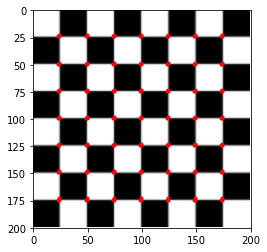

In [149]:
fig, ax = plt.subplots()
ax.imshow(checkboard_img, cmap=plt.cm.gray)
ax.plot(corners[:, 1], corners[:, 0], color='red', marker='o', linestyle='None', markersize=3)
ax.axis((0, 200, 200, 0))
plt.show()

### Corner detection in an urban scene

In [135]:
example_img = io.imread('images/monastero_catania.jpg')[:,:,0]
example_img.shape

(600, 800)

In [142]:
corners_example = corner_response(example_img, 0.05, 150000)
corners_example.shape

(2517, 2)

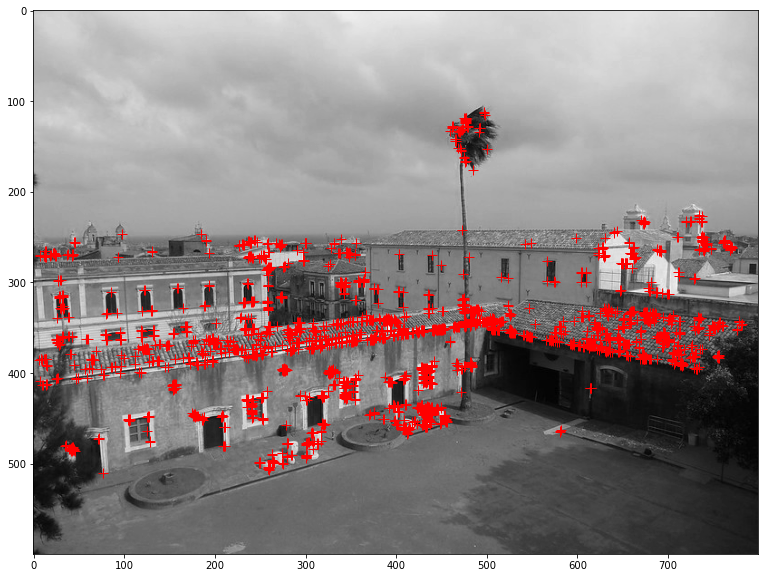

In [143]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
ax.imshow(example_img, cmap=plt.cm.gray)
ax.plot(corners_example[:, 1], corners_example[:, 0], color='red', marker='+', linestyle='None', markersize=10)
plt.show()

## A comparison with the Skimage test

In [145]:
coords = corner_peaks(corner_harris(example_img), min_distance=5, threshold_rel=0.02)
coords.shape

(434, 2)

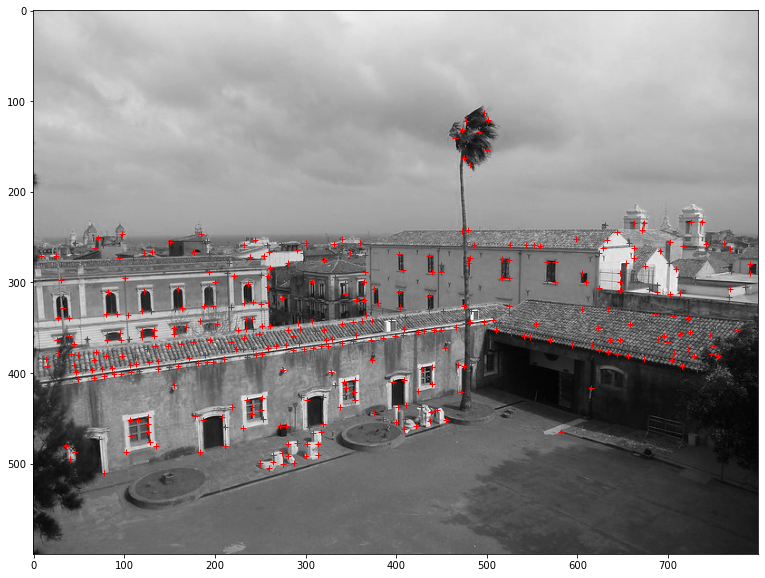

In [146]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
ax.imshow(example_img, cmap=plt.cm.gray)
ax.plot(coords[:, 1], coords[:, 0], color='red', marker='+', linestyle='None', markersize=6)
plt.show()